In [1]:
from SGDRegressor import SGDRegressor
from optimizer import BaseOptimizer, Momentum, Nesterov, AdaGrad, RMSProp, Adam
from utils import read_data, plot_log, min_max_scaling, standard_scaling, plot_trace_3d
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from memory_profiler import memory_usage

In [2]:
X, y = read_data()

## 1. Реализовать стохастический градиентный спуск для решения линейной регрессии. Исследовать сходимость с разным размером батча (1- SGD, 2..n-1 Minibatch GD, n - GD из предыдущей работы).

In [26]:
iter_counts = []
for batch_size in tqdm(range(1, 101, 10)):
    sgd = SGDRegressor(batch_size=batch_size, epochs_count=10000, optimizer=BaseOptimizer(0.001, 1))
    sgd.fit(X, y, plot_errors=False, epsilon=1e-2)
    iter_counts.append(sgd.iterations)

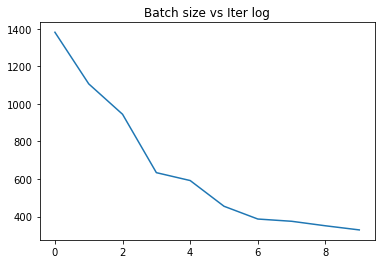

In [28]:
plot_log(iter_counts, 'Batch size vs Iter log')

## 2. Исследовать влияние предварительной нормализации данных (scaling) на сходимость.

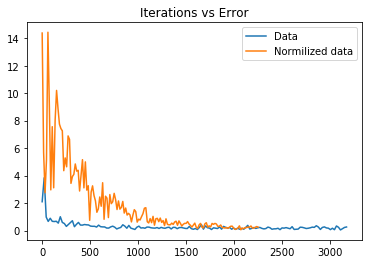

In [10]:
batch_size = 3
epsilon = 1e-2

X_norm = standard_scaling(X)

sgd = Momentum(alpha=0.9, beta=1e-4)
sgd = SGDRegressor(optimizer=sgd, batch_size=batch_size)
sgd.fit(X, y, plot_errors=False, epsilon=epsilon)
sgd.plot_errors_log('Data')

norm_sgd = Momentum(alpha=0.9, beta=1e-4)
norm_sgd = SGDRegressor(optimizer=norm_sgd, batch_size=batch_size)
norm_sgd.fit(X_norm, y, plot_errors=False, epsilon=epsilon)
norm_sgd.plot_errors_log('Normilized data')

plt.legend()

## 3. Исследовать модификации градиентного спуска (Nesterov, Momentum, AdaGrad, RMSProp, Adam).

array([[-1.94417438, -0.61801326,  0.02500652]])

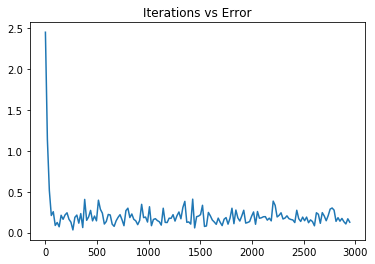

In [15]:
optimizer = Momentum(0.9, 1e-3)
sgd = SGDRegressor(optimizer=optimizer, batch_size=3)
sgd.fit(X, y)

array([[-1.96255281, -0.58995139,  0.00738266]])

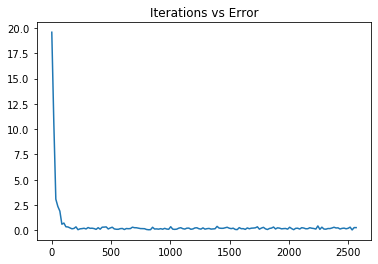

In [16]:
optimizer = Nesterov(0.9, 1e-3)
sgd = SGDRegressor(optimizer=optimizer, batch_size=3)
sgd.fit(X, y)

array([[-1.95991538, -0.60805811,  0.00815853]])

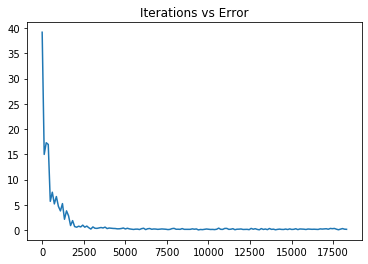

In [17]:
optimizer = AdaGrad(alpha=1e-1)
sgd = SGDRegressor(optimizer=optimizer, batch_size=3)
sgd.fit(X, y)

array([[-1.96274538, -0.60062819,  0.05442409]])

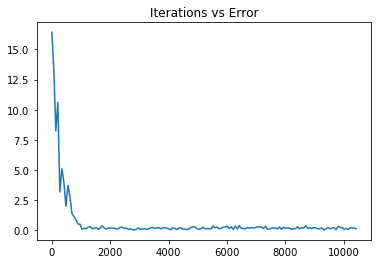

In [18]:
optimizer = RMSProp(alpha=1e-2)
sgd = SGDRegressor(optimizer=optimizer, batch_size=3)
sgd.fit(X, y)

array([[-1.95546934, -0.59950522, -0.03520031]])

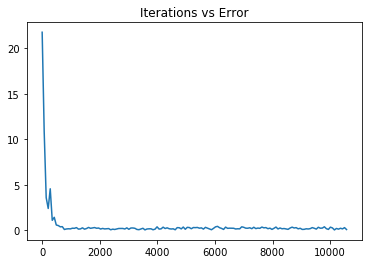

In [19]:
optimizer = Adam(alpha=1e-2)
sgd = SGDRegressor(optimizer=optimizer, batch_size=3)
sgd.fit(X, y)

## 4. Исследуйте сходимость алгоритмов. Сравнить различные методы по скорости сходимости, надежности, требуемым машинным ресурсам (объем оперативной памяти, количеству арифметических операций, времени выполнения)

Momentum: iters=1205, time=0.038049936294555664, memory=173.54296875
Nesterov: iters=2539, time=0.11420273780822754, memory=173.54296875
AdaGrad: iters=841, time=0.02543783187866211, memory=173.54296875
RMSProp: iters=630, time=0.021024227142333984, memory=173.5625
Adam: iters=2810, time=0.09029483795166016, memory=173.66015625


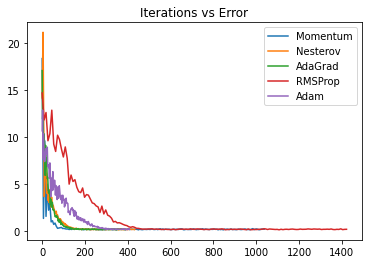

In [78]:
batch_size = 20
epsilon = 1e-1

momentum = Momentum(0.9, 1e-3)
momentum_sgd = SGDRegressor(optimizer=momentum, batch_size=batch_size)
momentum_sgd.fit(X, y, plot_errors=False, epsilon=epsilon)
momentum_sgd.plot_errors_log('Momentum')

nesterov = Nesterov(0.9, 1e-3)
nesterov_sgd = SGDRegressor(optimizer=nesterov, batch_size=batch_size)
nesterov_sgd.fit(X, y, plot_errors=False, epsilon=epsilon)
nesterov_sgd.plot_errors_log('Nesterov')

adagrad = AdaGrad(alpha=3e-1)
adagrad_sgd = SGDRegressor(optimizer=adagrad, batch_size=batch_size)
adagrad_sgd.fit(X, y, plot_errors=False, epsilon=epsilon)
adagrad_sgd.plot_errors_log('AdaGrad')

rmsprop = RMSProp(alpha=1e-2)
rmsprop_sgd = SGDRegressor(optimizer=rmsprop, batch_size=batch_size)
rmsprop_sgd.fit(X, y, plot_errors=False, epsilon=epsilon)
rmsprop_sgd.plot_errors_log('RMSProp')

adam = Adam(alpha=1e-2)
adam_sgd = SGDRegressor(optimizer=adam, batch_size=batch_size)
adam_sgd.fit(X, y, plot_errors=False, epsilon=epsilon)
adam_sgd.plot_errors_log('Adam')

plt.legend()

momentum_memory = memory_usage((momentum_sgd.fit, (X, y,), {'plot_errors': False, 'epsilon': epsilon}))[0]
nesterov_memory = memory_usage((nesterov_sgd.fit, (X, y,), {'plot_errors': False, 'epsilon': epsilon}))[0]
adagrad_memory = memory_usage((adagrad_sgd.fit, (X, y,), {'plot_errors': False, 'epsilon': epsilon}))[0]
rmsprop_memory = memory_usage((rmsprop_sgd.fit, (X, y,), {'plot_errors': False, 'epsilon': epsilon}))[0]
adam_memory = memory_usage((adam_sgd.fit, (X, y,), {'plot_errors': False, 'epsilon': epsilon}))[0]
print(f'Momentum: iters={momentum_sgd.iterations}, time={momentum_sgd.calculation_time}, memory={momentum_memory}')
print(f'Nesterov: iters={nesterov_sgd.iterations}, time={nesterov_sgd.calculation_time}, memory={nesterov_memory}')
print(f'AdaGrad: iters={adagrad_sgd.iterations}, time={adagrad_sgd.calculation_time}, memory={adagrad_memory}')
print(f'RMSProp: iters={rmsprop_sgd.iterations}, time={rmsprop_sgd.calculation_time}, memory={rmsprop_memory}')
print(f'Adam: iters={adam_sgd.iterations}, time={adam_sgd.calculation_time}, memory={adam_memory}')

Momentum: iters=1205, time=0.038049936294555664, memory=173.54296875

Nesterov: iters=2539, time=0.11420273780822754, memory=173.54296875

AdaGrad: iters=841, time=0.02543783187866211, memory=173.54296875

RMSProp: iters=630, time=0.021024227142333984, memory=173.5625

Adam: iters=2810, time=0.09029483795166016, memory=173.66015625

## 5. Построить траекторию спуска различных алгоритмов из одной и той же исходной точки с одинаковой точностью. В отчете наложить эту траекторию на рисунок с линиями равного уровня заданной функции.

initial_point: [[-0.89420275  0.29881374 -0.16674071]], final: [[-1.96070267 -0.61000345  0.00711549]]


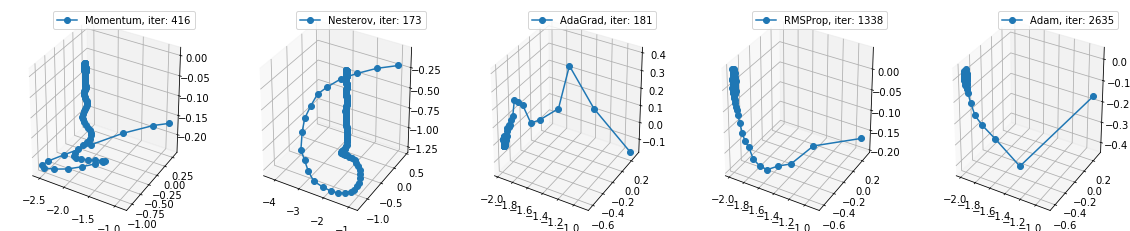

In [12]:
batch_size = 20
epsilon = 1e-1
initial_weights = np.sqrt(3) * np.random.randn(1, 3)
fig = plt.figure(figsize=(20, 4))

momentum = Momentum(0.9, 1e-3)
momentum_sgd = SGDRegressor(optimizer=momentum, batch_size=batch_size)
momentum_sgd.fit(X, y, plot_errors=False, epsilon=epsilon, initial_weights=initial_weights.copy())
plot_trace_3d(f'Momentum, iter: {len(momentum_sgd.weights_log)}', momentum_sgd.weights_log, fig.add_subplot(1, 5, 1, projection='3d'))
plt.legend(loc='upper right')

print(f'initial_point: {initial_weights}, final: {momentum_sgd.weights_log[-1]}')

nesterov = Nesterov(0.9, 1e-3)
nesterov_sgd = SGDRegressor(optimizer=nesterov, batch_size=batch_size)
nesterov_sgd.fit(X, y, plot_errors=False, epsilon=epsilon, initial_weights=initial_weights.copy())
plot_trace_3d(f'Nesterov, iter: {len(nesterov_sgd.weights_log)}', nesterov_sgd.weights_log, fig.add_subplot(1, 5, 2, projection='3d'))
plt.legend(loc='upper right')


adagrad = AdaGrad(alpha=3e-1)
adagrad_sgd = SGDRegressor(optimizer=adagrad, batch_size=batch_size)
adagrad_sgd.fit(X, y, plot_errors=False, epsilon=epsilon, initial_weights=initial_weights.copy())
plot_trace_3d(f'AdaGrad, iter: {len(adagrad_sgd.weights_log)}', adagrad_sgd.weights_log, fig.add_subplot(1, 5, 3, projection='3d'))
plt.legend(loc='upper right')

rmsprop = RMSProp(alpha=1e-2)
rmsprop_sgd = SGDRegressor(optimizer=rmsprop, batch_size=batch_size)
rmsprop_sgd.fit(X, y, plot_errors=False, epsilon=epsilon, initial_weights=initial_weights.copy())
plot_trace_3d(f'RMSProp, iter: {len(rmsprop_sgd.weights_log)}', rmsprop_sgd.weights_log, fig.add_subplot(1, 5, 4, projection='3d'))
plt.legend(loc='upper right')

adam = Adam(alpha=1e-2)
adam_sgd = SGDRegressor(optimizer=adam, batch_size=batch_size)
adam_sgd.fit(X, y, plot_errors=False, epsilon=epsilon, initial_weights=initial_weights.copy())
plot_trace_3d(f'Adam, iter: {len(adam_sgd.weights_log)}', adam_sgd.weights_log, fig.add_subplot(1, 5, 5, projection='3d'))
plt.legend(loc='upper right')

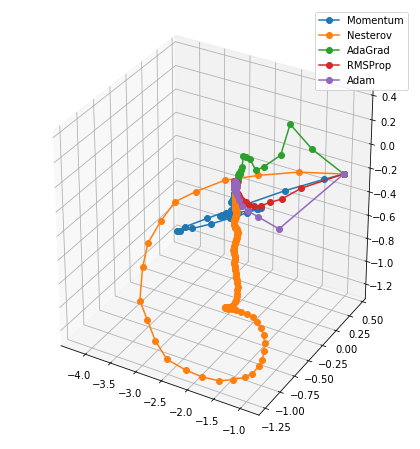

In [13]:
fig = plt.figure(figsize=(16, 8))
ax3d = fig.add_subplot(1, 2, 1, projection='3d')

plot_trace_3d('Momentum', momentum_sgd.weights_log, ax3d)

plot_trace_3d('Nesterov', nesterov_sgd.weights_log, ax3d)


plot_trace_3d('AdaGrad', adagrad_sgd.weights_log, ax3d)

plot_trace_3d('RMSProp', rmsprop_sgd.weights_log, ax3d)

plot_trace_3d('Adam', adam_sgd.weights_log, ax3d)

plt.legend()